# RMSProp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ProjectsDataset/PlantVillage.zip -d \dataset\

In [ ]:
!rm -rf /content/dataset/__MACOSX

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import resnet
from keras.applications.resnet import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
file_path = '/content/dataset/PlantVillage'

In [ ]:
!rm -rf /content/dataset/PlantVillage/.DS_Store
!rm -rf /content/dataset/PlantVillage/Pepper__bell___Bacterial_spot
!rm -rf /content/dataset/PlantVillage/Pepper__bell___healthy
!rm -rf /content/dataset/PlantVillage/Potato___Early_blight
!rm -rf /content/dataset/PlantVillage/Potato___Late_blight
!rm -rf /content/dataset/PlantVillage/Potato___healthy

In [ ]:
name_class = os.listdir(file_path)
name_class

['Tomato_Septoria_leaf_spot',
 'Tomato_Leaf_Mold',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Filepath,Label
0,/content/dataset/PlantVillage/Tomato_Spider_mi...,Tomato_Spider_mites_Two_spotted_spider_mite
1,/content/dataset/PlantVillage/Tomato_Spider_mi...,Tomato_Spider_mites_Two_spotted_spider_mite
2,/content/dataset/PlantVillage/Tomato_Septoria_...,Tomato_Septoria_leaf_spot
3,/content/dataset/PlantVillage/Tomato_Bacterial...,Tomato_Bacterial_spot
4,/content/dataset/PlantVillage/Tomato_Bacterial...,Tomato_Bacterial_spot


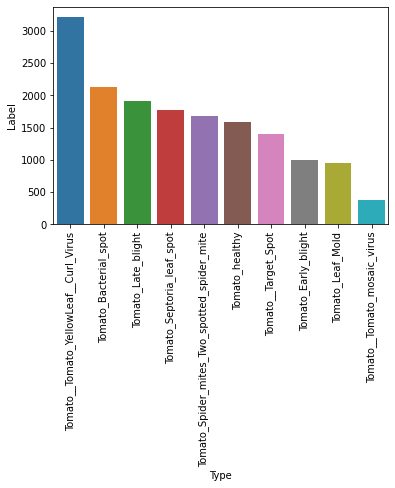

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

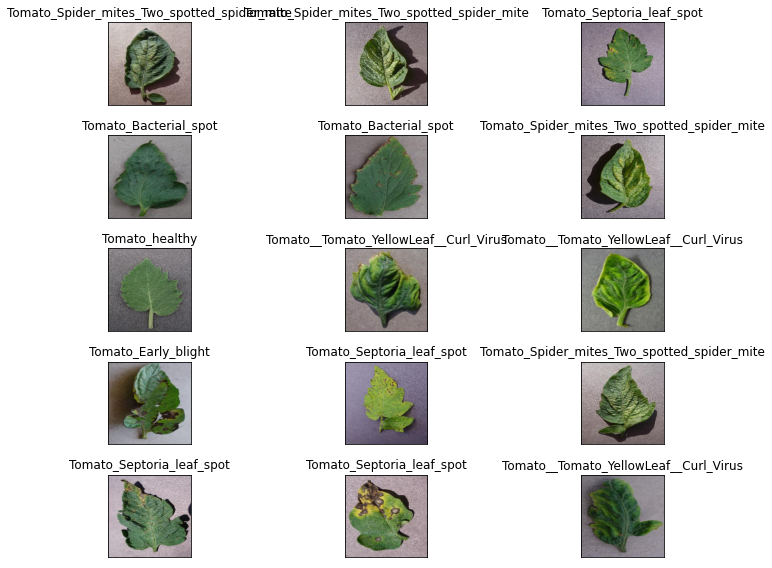

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   brightness_range=[0.4,1.5],
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 12008 validated image filenames belonging to 10 classes.
Found 12008 validated image filenames belonging to 10 classes.
Found 4003 validated image filenames belonging to 10 classes.


In [ ]:
pretrained_model = resnet.ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50)

Epoch 1/50
376/376 [==============================] - 46s 116ms/step - loss: 0.6915 - accuracy: 0.7660 - val_loss: 0.3999 - val_accuracy: 0.8589
Epoch 2/50
376/376 [==============================] - 43s 113ms/step - loss: 0.3221 - accuracy: 0.8882 - val_loss: 0.3794 - val_accuracy: 0.8688
Epoch 3/50
376/376 [==============================] - 42s 113ms/step - loss: 0.2345 - accuracy: 0.9189 - val_loss: 0.1870 - val_accuracy: 0.9300
Epoch 4/50
376/376 [==============================] - 42s 113ms/step - loss: 0.1764 - accuracy: 0.9397 - val_loss: 0.1155 - val_accuracy: 0.9579
Epoch 5/50
376/376 [==============================] - 43s 113ms/step - loss: 0.1425 - accuracy: 0.9527 - val_loss: 0.2461 - val_accuracy: 0.9277
Epoch 6/50
376/376 [==============================] - 42s 113ms/step - loss: 0.1213 - accuracy: 0.9579 - val_loss: 0.1134 - val_accuracy: 0.9601
Epoch 7/50
376/376 [==============================] - 42s 113ms/step - loss: 0.0960 - accuracy: 0.9668 - val_loss: 0.0826 - val_ac

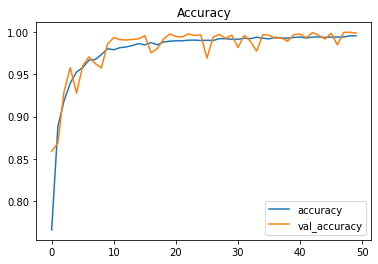

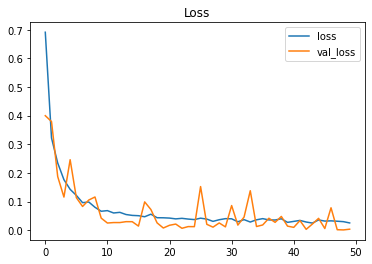

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.08312
Test Accuracy: 93.48%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.93      0.90      0.92       522
                        Tomato_Early_blight       0.92      0.92      0.92       233
                         Tomato_Late_blight       0.92      0.91      0.92       477
                           Tomato_Leaf_Mold       0.93      0.91      0.92       250
                  Tomato_Septoria_leaf_spot       0.91      0.90      0.91       436
Tomato_Spider_mites_Two_spotted_spider_mite       0.90      0.93      0.92       446
                        Tomato__Target_Spot       0.91      0.93      0.92       345
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.93      0.92      0.93       810
                Tomato__Tomato_mosaic_virus       0.92      0.92      0.92        93
                             Tomato_healthy       0.92      0.91      0.92       391

                                   accuracy                    

# SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ProjectsDataset/PlantVillage.zip -d \dataset\

Streaming output truncated to the last 5000 lines.
  inflating: dataset/PlantVillage/Tomato_Late_blight/a5af0d83-aba8-4353-bfa4-ea4f959d9787___GHLB2 Leaf 9052.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._a5af0d83-aba8-4353-bfa4-ea4f959d9787___GHLB2 Leaf 9052.JPG  
  inflating: dataset/PlantVillage/Tomato_Late_blight/fabaa5c5-3180-49b7-b538-d1a31316afd8___GHLB2 Leaf 121.4.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._fabaa5c5-3180-49b7-b538-d1a31316afd8___GHLB2 Leaf 121.4.JPG  
  inflating: dataset/PlantVillage/Tomato_Late_blight/c4e17a14-ebac-4e2b-b00f-8b6b5e267b42___RS_Late.B 5097.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._c4e17a14-ebac-4e2b-b00f-8b6b5e267b42___RS_Late.B 5097.JPG  
  inflating: dataset/PlantVillage/Tomato_Late_blight/a65ce89e-dc42-4ef6-ae82-68017cec5884___GHLB2 Leaf 8653.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._a65ce89e-dc42-4ef6-ae82-68017cec5884___GHLB2 Leaf 8653

In [ ]:
!rm -rf /content/dataset/__MACOSX

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import resnet
from keras.applications.resnet import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
file_path = '/content/dataset/PlantVillage'

In [ ]:
!rm -rf /content/dataset/PlantVillage/.DS_Store
!rm -rf /content/dataset/PlantVillage/Pepper__bell___Bacterial_spot
!rm -rf /content/dataset/PlantVillage/Pepper__bell___healthy
!rm -rf /content/dataset/PlantVillage/Potato___Early_blight
!rm -rf /content/dataset/PlantVillage/Potato___Late_blight
!rm -rf /content/dataset/PlantVillage/Potato___healthy

In [ ]:
name_class = os.listdir(file_path)
name_class

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Early_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato_Leaf_Mold',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Late_blight',
 'Tomato_healthy',
 'Tomato__Tomato_mosaic_virus']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Filepath,Label
0,/content/dataset/PlantVillage/Tomato_Early_bli...,Tomato_Early_blight
1,/content/dataset/PlantVillage/Tomato_Septoria_...,Tomato_Septoria_leaf_spot
2,/content/dataset/PlantVillage/Tomato__Tomato_Y...,Tomato__Tomato_YellowLeaf__Curl_Virus
3,/content/dataset/PlantVillage/Tomato_Spider_mi...,Tomato_Spider_mites_Two_spotted_spider_mite
4,/content/dataset/PlantVillage/Tomato_Spider_mi...,Tomato_Spider_mites_Two_spotted_spider_mite


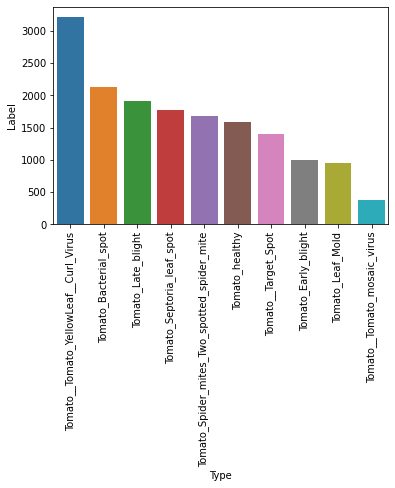

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

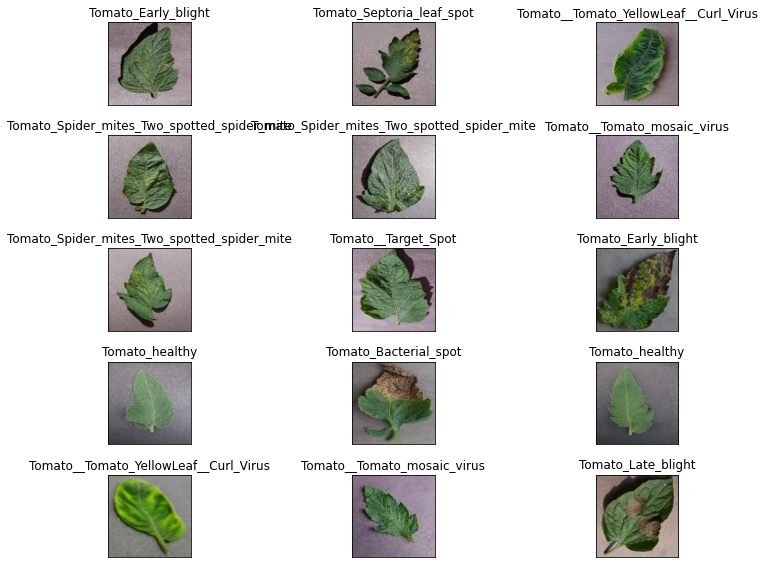

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   brightness_range=[0.4,1.5],
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 12008 validated image filenames belonging to 10 classes.
Found 12008 validated image filenames belonging to 10 classes.
Found 4003 validated image filenames belonging to 10 classes.


In [ ]:
pretrained_model = resnet.ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50)

Epoch 1/50
376/376 [==============================] - 79s 176ms/step - loss: 0.8708 - accuracy: 0.7101 - val_loss: 0.4956 - val_accuracy: 0.8303
Epoch 2/50
376/376 [==============================] - 63s 168ms/step - loss: 0.4315 - accuracy: 0.8540 - val_loss: 0.3354 - val_accuracy: 0.8892
Epoch 3/50
376/376 [==============================] - 63s 168ms/step - loss: 0.3288 - accuracy: 0.8877 - val_loss: 0.2687 - val_accuracy: 0.9111
Epoch 4/50
376/376 [==============================] - 62s 166ms/step - loss: 0.2638 - accuracy: 0.9108 - val_loss: 0.2005 - val_accuracy: 0.9379
Epoch 5/50
376/376 [==============================] - 63s 167ms/step - loss: 0.2219 - accuracy: 0.9241 - val_loss: 0.2011 - val_accuracy: 0.9330
Epoch 6/50
376/376 [==============================] - 64s 171ms/step - loss: 0.1925 - accuracy: 0.9360 - val_loss: 0.1887 - val_accuracy: 0.9355
Epoch 7/50
376/376 [==============================] - 63s 167ms/step - loss: 0.1688 - accuracy: 0.9438 - val_loss: 0.1271 - val_ac

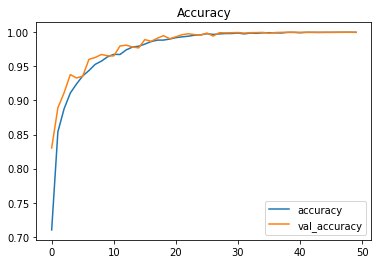

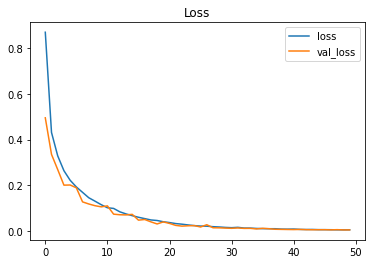

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.04415
Test Accuracy: 97.47%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.95      0.94      0.95       522
                        Tomato_Early_blight       0.94      0.96      0.95       233
                         Tomato_Late_blight       0.96      0.95      0.96       477
                           Tomato_Leaf_Mold       0.97      0.97      0.97       250
                  Tomato_Septoria_leaf_spot       0.98      0.95      0.97       436
Tomato_Spider_mites_Two_spotted_spider_mite       0.96      0.97      0.97       446
                        Tomato__Target_Spot       0.95      0.96      0.96       345
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.95      0.95      0.95       810
                Tomato__Tomato_mosaic_virus       0.97      0.96      0.97        93
                             Tomato_healthy       0.98      0.97      0.98       391

                                   accuracy                    

# Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ProjectsDataset/PlantVillage.zip -d \dataset\

Streaming output truncated to the last 5000 lines.
  inflating: dataset/PlantVillage/Tomato_Late_blight/a5af0d83-aba8-4353-bfa4-ea4f959d9787___GHLB2 Leaf 9052.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._a5af0d83-aba8-4353-bfa4-ea4f959d9787___GHLB2 Leaf 9052.JPG  
  inflating: dataset/PlantVillage/Tomato_Late_blight/fabaa5c5-3180-49b7-b538-d1a31316afd8___GHLB2 Leaf 121.4.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._fabaa5c5-3180-49b7-b538-d1a31316afd8___GHLB2 Leaf 121.4.JPG  
  inflating: dataset/PlantVillage/Tomato_Late_blight/c4e17a14-ebac-4e2b-b00f-8b6b5e267b42___RS_Late.B 5097.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._c4e17a14-ebac-4e2b-b00f-8b6b5e267b42___RS_Late.B 5097.JPG  
  inflating: dataset/PlantVillage/Tomato_Late_blight/a65ce89e-dc42-4ef6-ae82-68017cec5884___GHLB2 Leaf 8653.JPG  
  inflating: dataset/__MACOSX/PlantVillage/Tomato_Late_blight/._a65ce89e-dc42-4ef6-ae82-68017cec5884___GHLB2 Leaf 8653

In [ ]:
!rm -rf /content/dataset/__MACOSX

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import resnet
from keras.applications.resnet import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
file_path = '/content/dataset/PlantVillage'

In [ ]:
!rm -rf /content/dataset/PlantVillage/.DS_Store
!rm -rf /content/dataset/PlantVillage/Pepper__bell___Bacterial_spot
!rm -rf /content/dataset/PlantVillage/Pepper__bell___healthy
!rm -rf /content/dataset/PlantVillage/Potato___Early_blight
!rm -rf /content/dataset/PlantVillage/Potato___Late_blight
!rm -rf /content/dataset/PlantVillage/Potato___healthy

In [ ]:
name_class = os.listdir(file_path)
name_class

['Tomato_Leaf_Mold',
 'Tomato_Late_blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Bacterial_spot',
 'Tomato__Target_Spot',
 'Tomato_Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_healthy']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Filepath,Label
0,/content/dataset/PlantVillage/Tomato__Target_S...,Tomato__Target_Spot
1,/content/dataset/PlantVillage/Tomato_Bacterial...,Tomato_Bacterial_spot
2,/content/dataset/PlantVillage/Tomato__Tomato_Y...,Tomato__Tomato_YellowLeaf__Curl_Virus
3,/content/dataset/PlantVillage/Tomato_healthy/6...,Tomato_healthy
4,/content/dataset/PlantVillage/Tomato_Leaf_Mold...,Tomato_Leaf_Mold


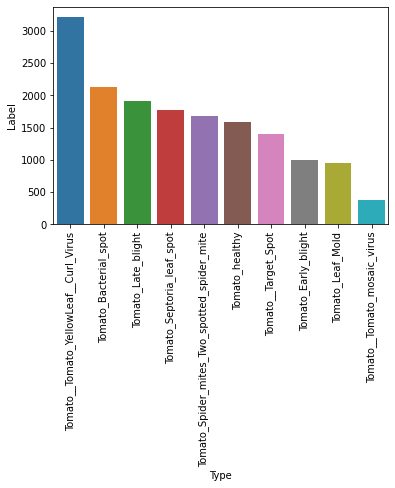

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

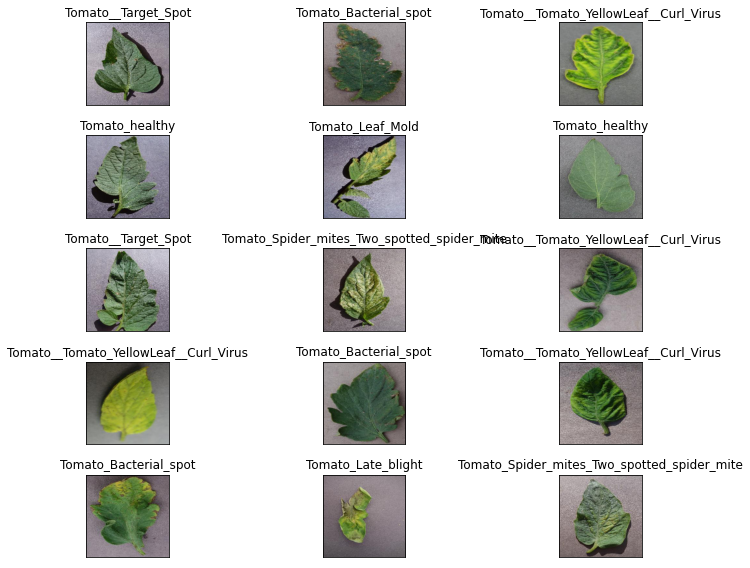

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   brightness_range=[0.4,1.5],
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 12008 validated image filenames belonging to 10 classes.
Found 2401 validated image filenames belonging to 10 classes.
Found 4003 validated image filenames belonging to 10 classes.


In [ ]:
pretrained_model = resnet.ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94781440/94765736 [==============================] - 3s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50)

Epoch 1/50
376/376 [==============================] - 68s 170ms/step - loss: 0.5644 - accuracy: 0.8095 - val_loss: 0.2656 - val_accuracy: 0.9090
Epoch 2/50
376/376 [==============================] - 61s 161ms/step - loss: 0.2721 - accuracy: 0.9037 - val_loss: 0.1496 - val_accuracy: 0.9489
Epoch 3/50
376/376 [==============================] - 61s 163ms/step - loss: 0.1809 - accuracy: 0.9359 - val_loss: 0.1682 - val_accuracy: 0.9395
Epoch 4/50
376/376 [==============================] - 60s 161ms/step - loss: 0.1331 - accuracy: 0.9529 - val_loss: 0.2003 - val_accuracy: 0.9237
Epoch 5/50
376/376 [==============================] - 60s 160ms/step - loss: 0.1168 - accuracy: 0.9584 - val_loss: 0.0961 - val_accuracy: 0.9664
Epoch 6/50
376/376 [==============================] - 60s 160ms/step - loss: 0.0831 - accuracy: 0.9706 - val_loss: 0.0718 - val_accuracy: 0.9739
Epoch 7/50
376/376 [==============================] - 60s 159ms/step - loss: 0.0796 - accuracy: 0.9705 - val_loss: 0.0749 - val_ac

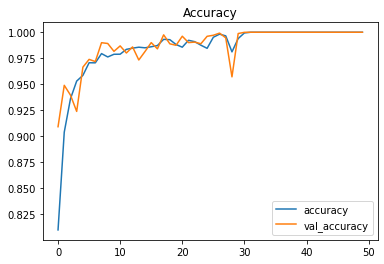

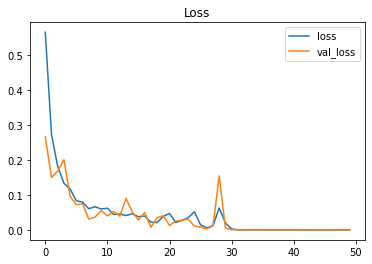

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [1]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.02641
Test Accuracy: 99.75%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [5]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.99      0.99      0.99       522
                        Tomato_Early_blight       0.99      0.99      0.99       233
                         Tomato_Late_blight       0.99      1.00      0.99       477
                           Tomato_Leaf_Mold       0.98      0.99      0.99       250
                  Tomato_Septoria_leaf_spot       0.98      0.99      0.99       436
Tomato_Spider_mites_Two_spotted_spider_mite       0.99      1.00      0.99       446
                        Tomato__Target_Spot       0.99      1.00      0.99       345
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.98      0.99      0.99       810
                Tomato__Tomato_mosaic_virus       0.99      0.99      0.99        93
                             Tomato_healthy       1.00      1.00      1.00       391

                                   accuracy                    